In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Set styles
sns.set(style="whitegrid")


In [2]:
# 2. Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\50_Startups.csv")
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000

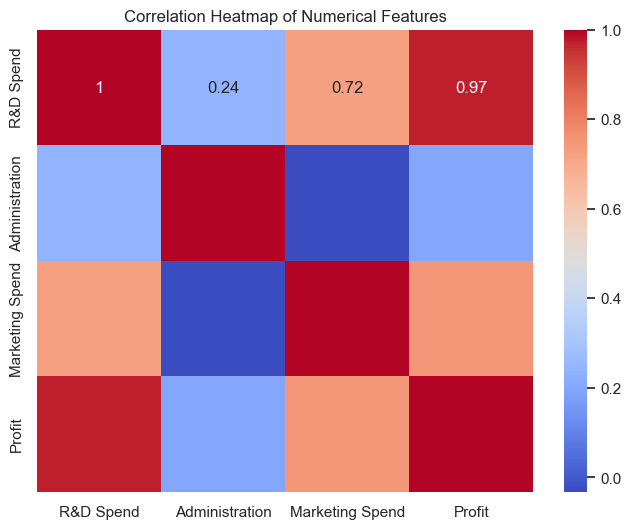

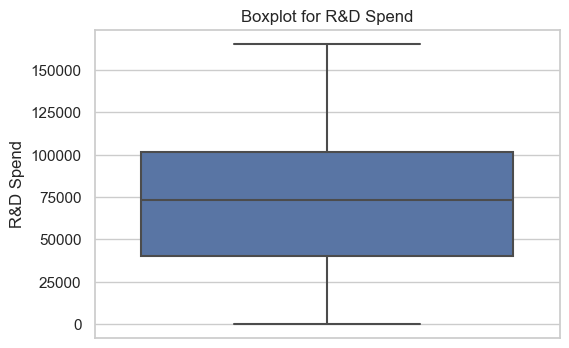

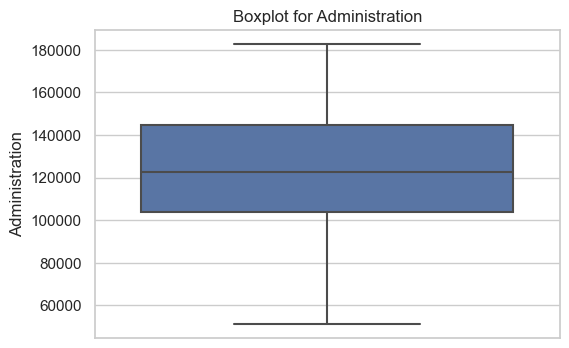

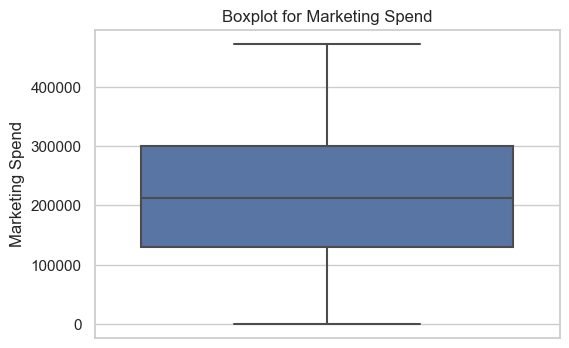

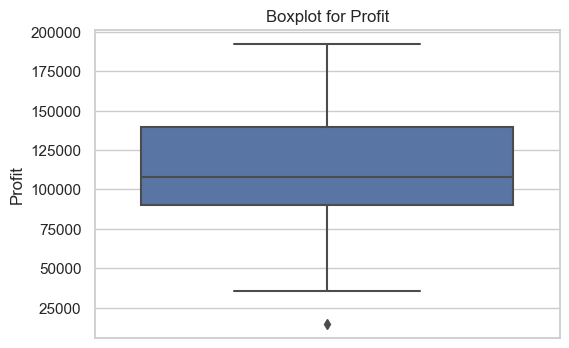

In [4]:
# 3. Exploratory Data Analysis (EDA)

# Dataset structure
print(df.info())

# Summary statistics
print(df.describe())

# Only include numeric columns in correlation
numeric_df = df.select_dtypes(include=['number'])

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Boxplots for outliers
numeric_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot for {col}')
    plt.show()


In [5]:
# 4. Data Preprocessing

# One-hot encode categorical variable 'State'
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

# Features and target
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']


In [6]:
# 5. Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 40
Testing samples: 10


In [7]:
# 6. Model 1: Simple Linear Regression (All Features)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model1.coef_
})
print(coeff_df)

# Evaluation
print("\nModel 1 Evaluation:")
print("R² Score:", r2_score(y_test, y_pred1))
print("RMSE:", mean_squared_error(y_test, y_pred1, squared=False))


           Feature  Coefficient
0        R&D Spend     0.805630
1   Administration    -0.068788
2  Marketing Spend     0.029855
3    State_Florida   938.793006
4   State_New York     6.987760

Model 1 Evaluation:
R² Score: 0.8987266414328636
RMSE: 9055.957323458468


In [8]:
# 7. Model 2: Ridge Regression (Regularization)
model2 = Ridge(alpha=1.0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("\nModel 2 (Ridge) Evaluation:")
print("R² Score:", r2_score(y_test, y_pred2))
print("RMSE:", mean_squared_error(y_test, y_pred2, squared=False))



Model 2 (Ridge) Evaluation:
R² Score: 0.8988780252113923
RMSE: 9049.186353499545


In [9]:
# 8. Model 3: Lasso Regression (Feature selection)
model3 = Lasso(alpha=0.5)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print("\nModel 3 (Lasso) Evaluation:")
print("R² Score:", r2_score(y_test, y_pred3))
print("RMSE:", mean_squared_error(y_test, y_pred3, squared=False))

# Lasso Coefficients
pd.DataFrame({
    'Feature': X.columns,
    'Lasso Coef': model3.coef_
})



Model 3 (Lasso) Evaluation:
R² Score: 0.8987304479600758
RMSE: 9055.787130268483


,Feature,Lasso Coef
0,R&D Spend,0.805627
1,Administration,-0.068783
2,Marketing Spend,0.029862
3,State_Florida,933.850524
4,State_New York,2.063099


### Assumptions & Discussion:
Linear regression assumes a linear relationship between predictors and the response.

Multicollinearity may exist (e.g., between R&D and Marketing spend). Regularization models (Ridge, Lasso) help control it.

One-hot encoding used for categorical variable State.

Lasso model may drive irrelevant feature coefficients to zero (useful for feature selection).

